In [2]:
from scrapy import nn
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#=nb

In [3]:
train_img = idx2numpy.convert_from_file("C:\\Users\\pro\\Documents\\GitHub\\scrapy\\train-images.idx3-ubyte")/255
train_lbl = idx2numpy.convert_from_file("C:\\Users\\pro\\Documents\\GitHub\\scrapy\\train-labels.idx1-ubyte")
test_img = idx2numpy.convert_from_file("C:\\Users\\pro\\Documents\\GitHub\\scrapy\\t10k-images.idx3-ubyte")/255
test_lbl = idx2numpy.convert_from_file("C:\\Users\\pro\\Documents\\GitHub\\scrapy\\t10k-labels.idx1-ubyte")

train_img.shape, train_lbl.shape, " test" , test_img.shape, test_lbl.shape 

((60000, 28, 28), (60000,), ' test', (10000, 28, 28), (10000,))

In [4]:
batch = 32
train_data =  list(zip(np.array_split(train_img.reshape(-1,28*28),batch), np.array_split(train_lbl, batch)))
test_data = list(zip(np.array_split(test_img.reshape(-1,28*28), batch), np.array_split(test_lbl, batch)))


In [5]:
l1 = nn.Layer_Dense(28*28,200)
a1 = nn.Activation_ReLU()
l2 = nn.Layer_Dense(200,100)
a2 = nn.Activation_ReLU()
l3 = nn.Layer_Dense(100,10)
a3 = nn.Activation_softmax()
loss = nn.Loss_Catagorical()
optimizer = nn.Optimizer_ADAM(learning_rate=0.001, decay=1e-3)

In [27]:
def train(print_every = 100 ):
    for batch,(i,j) in enumerate(train_data):
        l1.forward(i)
        a1.forward(l1.output)
        l2.forward(a1.output)
        a2.forward(l2.output)
        l3.forward(a2.output)
        a3.forward(l3.output)
        loss.forward(a3.output, j)
        loss.backward()
        optimizer.step(l3)
        optimizer.step(l2)
        optimizer.step(l1)
        if ((batch + 1) * len(i)) % print_every == 0:
            current = (batch + 1) * len(i)
            print(f'Loss : {loss.output.value} [{current}/{len(train_img)}]')

In [61]:
def test():
    total_loss,correct = 0,0
    for batch,(i,j) in enumerate(test_data):
        l1.forward(i)
        a1.forward(l1.output)
        l2.forward(a1.output)
        a2.forward(l2.output)
        l3.forward(a2.output)
        a3.forward(l3.output)
        loss.forward(a3.output, j)
        total_loss += loss.output.value
        correct += (np.argmax(a3.output.value ,axis = 1) == j).sum()
    correct/= len(test_img)
    total_loss /= len(test_data)
    print(f'Loss : {total_loss},  Accuracy : {correct}')

In [63]:
epochs = 5
for i in range(epochs):
    print(f'Epoch : {i+1}-------------------------------------------------')
    train()
    test()

Epoch : 1-------------------------------------------------
Loss : 0.32799506014316226 [7500/60000]
Loss : 0.35102280891253995 [15000/60000]
Loss : 0.32569483757588374 [22500/60000]
Loss : 0.32428579960518855 [30000/60000]
Loss : 0.3222261696731424 [37500/60000]
Loss : 0.29161273208108934 [45000/60000]
Loss : 0.3013477847884767 [52500/60000]
Loss : 0.21178955812738673 [60000/60000]
Loss : 0.30558564929356263,  Accuracy : 0.9459
Epoch : 2-------------------------------------------------
Loss : 0.29999016733557865 [7500/60000]
Loss : 0.32697598269151995 [15000/60000]
Loss : 0.3033563049003945 [22500/60000]
Loss : 0.30489940226511464 [30000/60000]
Loss : 0.30023825435885826 [37500/60000]
Loss : 0.2696619591678634 [45000/60000]
Loss : 0.2774795367530161 [52500/60000]
Loss : 0.1944773839111042 [60000/60000]
Loss : 0.2853170100050525,  Accuracy : 0.9487
Epoch : 3-------------------------------------------------
Loss : 0.2796029085592537 [7500/60000]
Loss : 0.30629824963747515 [15000/60000]
Lo

In [94]:
def pred(img):
    l1.forward(img)
    a1.forward(l1.output)
    l2.forward(a1.output)
    a2.forward(l2.output)
    l3.forward(a2.output)
    a3.forward(l3.output) 
    return np.argmax(a3.output.value ,axis = 1)

In [82]:
classes = {
    0: 'Zero',
    1: 'One',
    2: 'Two',
    3: 'Three',
    4: 'Four',
    5: 'Five',
    6: 'Six',
    7: 'Seven',
    8: 'Eight',
    9: 'Nine'
}

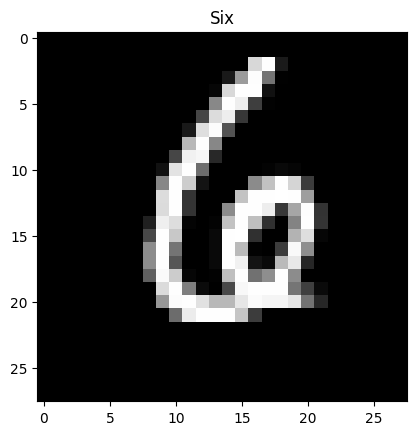

In [140]:
img = test_img[np.random.randint(0,1000)]
plt.title(classes[int(pred(img.reshape(-1,28*28))[0])])
plt.imshow(img.reshape(28,28), cmap='gray')